# Merging WSI-level Segmentation

In this example, we will show how to merge WSI-level segmentation masks into a single mask. Both tissue and nuclei segmentation masks will be merged. The data used in this example is not publicly available, so this serves only as a demonstration of the functionality.

Let's first look at the data. The underlying WSI was first tiled before segmentation so the segmentations masks are also tiles. Basically, we have one folder with 1000x1000px nuclei segmentation masks that are adjascent to each other and another folder with 1000x1000px tissue segmentation masks of the same tiles.

In [1]:
from pathlib import Path
from cellseg_gsontools.merging import CellMerger

g = Path("/my/path/to/wsi_seg/geojson/cells")

in_files = sorted(g.glob("*"))
print("Number of input files:", len(in_files), "\n")

# first 10 files
for f in list(g.glob("*"))[:10]:
    print(f.name)

Number of input files: 861 

x-22000_y-92000_cells.json
x-22000_y-93000_cells.json
x-22000_y-94000_cells.json
x-23000_y-91000_cells.json
x-23000_y-92000_cells.json
x-23000_y-93000_cells.json
x-23000_y-94000_cells.json
x-23000_y-95000_cells.json
x-23000_y-96000_cells.json
x-24000_y-90000_cells.json


**NOTE:** 
    The segmentation files need to contain a `class_name` column

In [9]:
from cellseg_gsontools import read_gdf

read_gdf(in_files[0]).head(4)

,type,id,geometry,properties,class_name
0,Feature,PathCellDetection,"POLYGON ((22992.000 92584.000, 22991.000 92585...","{'isLocked': 'false', 'measurements': [], 'cla...",neoplastic
1,Feature,PathCellDetection,"POLYGON ((22957.000 92595.000, 22956.000 92596...","{'isLocked': 'false', 'measurements': [], 'cla...",neoplastic
2,Feature,PathCellDetection,"POLYGON ((22900.000 92622.000, 22897.000 92625...","{'isLocked': 'false', 'measurements': [], 'cla...",connective
3,Feature,PathCellDetection,"POLYGON ((22894.000 92651.000, 22893.000 92652...","{'isLocked': 'false', 'measurements': [], 'cla...",connective


## Merging the Nuclei

Let's now merge the nuclei segmentation maps with the `CellMerger` class. The merging is simple but can take a few minutes.

In [2]:
merger = CellMerger(g, tile_size=(1000, 1000))
merger.merge_dir(
    out_fn=None, # do not save the output to a file
    format=None, # one of "geojson", "parquet", "feather", None
    verbose=True,
)

Processing file: x-22000_y-92000_cells.json:   0%|          | 0/861 [00:00<?, ?it/s]

Processing file: x-49000_y-83000_cells.json: 100%|██████████| 861/861 [14:53<00:00,  1.04s/it] 


Saving the merged geojson file: None to `self.annots`


<Axes: >

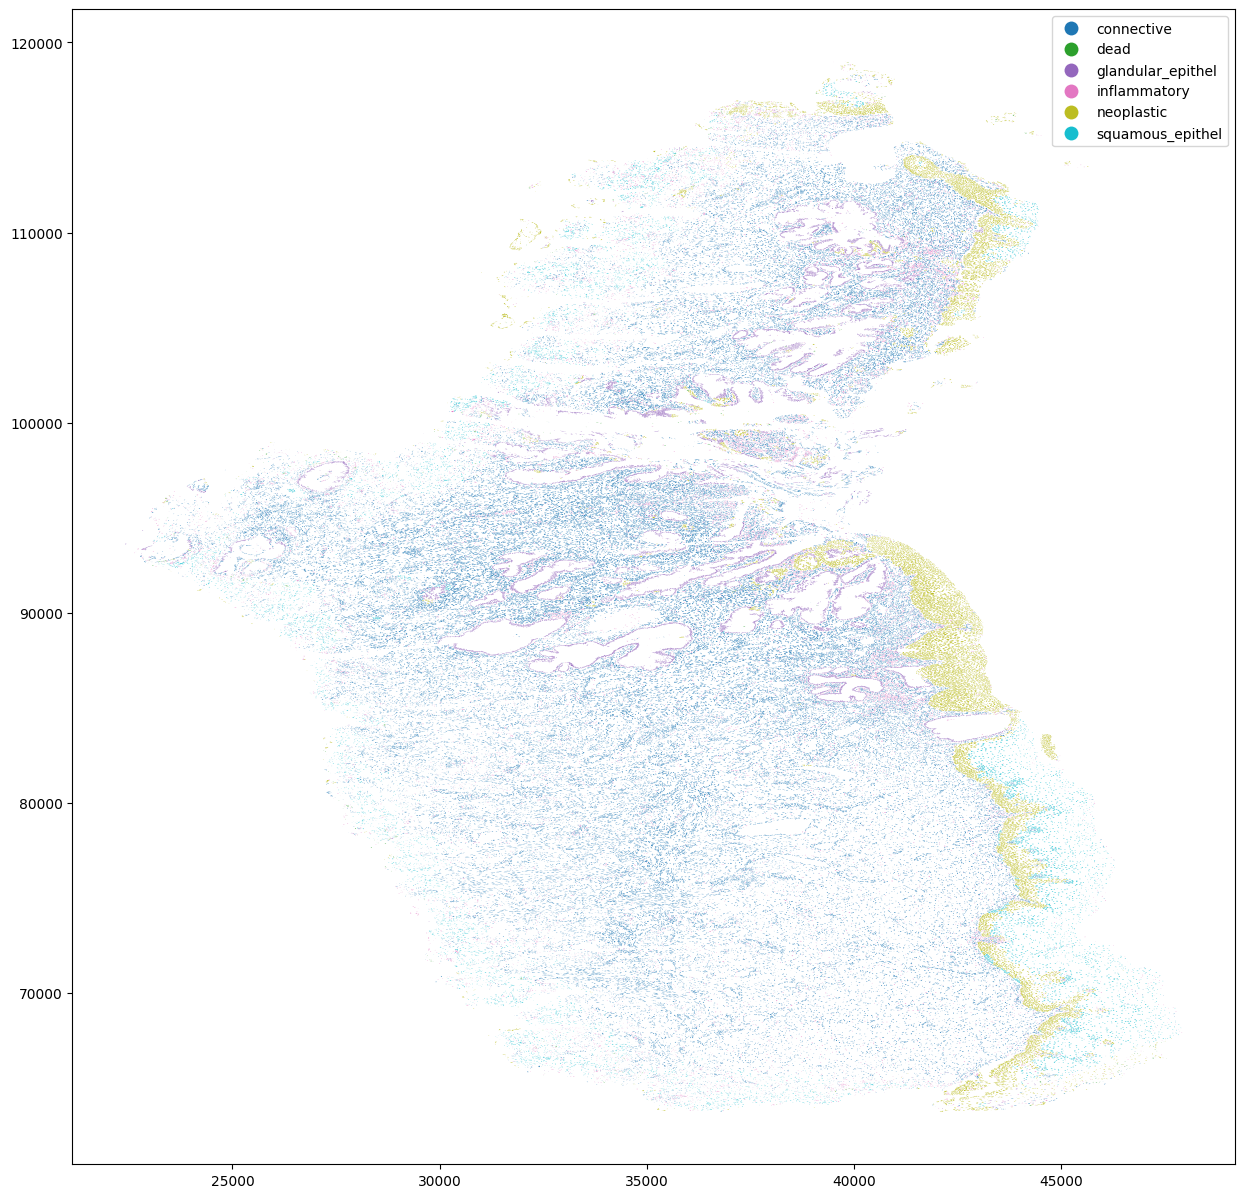

In [11]:
merger.annots.plot(
    figsize=(15, 15),
    column="class_name",
    legend=True,
    aspect=None,
)

## Merging the Tissue Segmentations

The tissue segmentation masks are merged with the `AreaMerger` class.

In [4]:
from cellseg_gsontools.merging import AreaMerger

# Note that the AreaMerger does not require the tile_size argument
g = Path("/my/path/to/wsi_seg/geojson/areas")
area_merger = AreaMerger(g)

area_merger.merge_dir(
    out_fn=None, # do not save the output to a file
    format=None, # one of "geojson", "parquet", "feather", None
    verbose=True,
    parallel=True, # AreaMerger can be run in parallel
)

100%|██████████| 4/4 [01:27<00:00, 21.86s/it]

Saving the merged geojson file: None to `self.annots`


<Axes: >

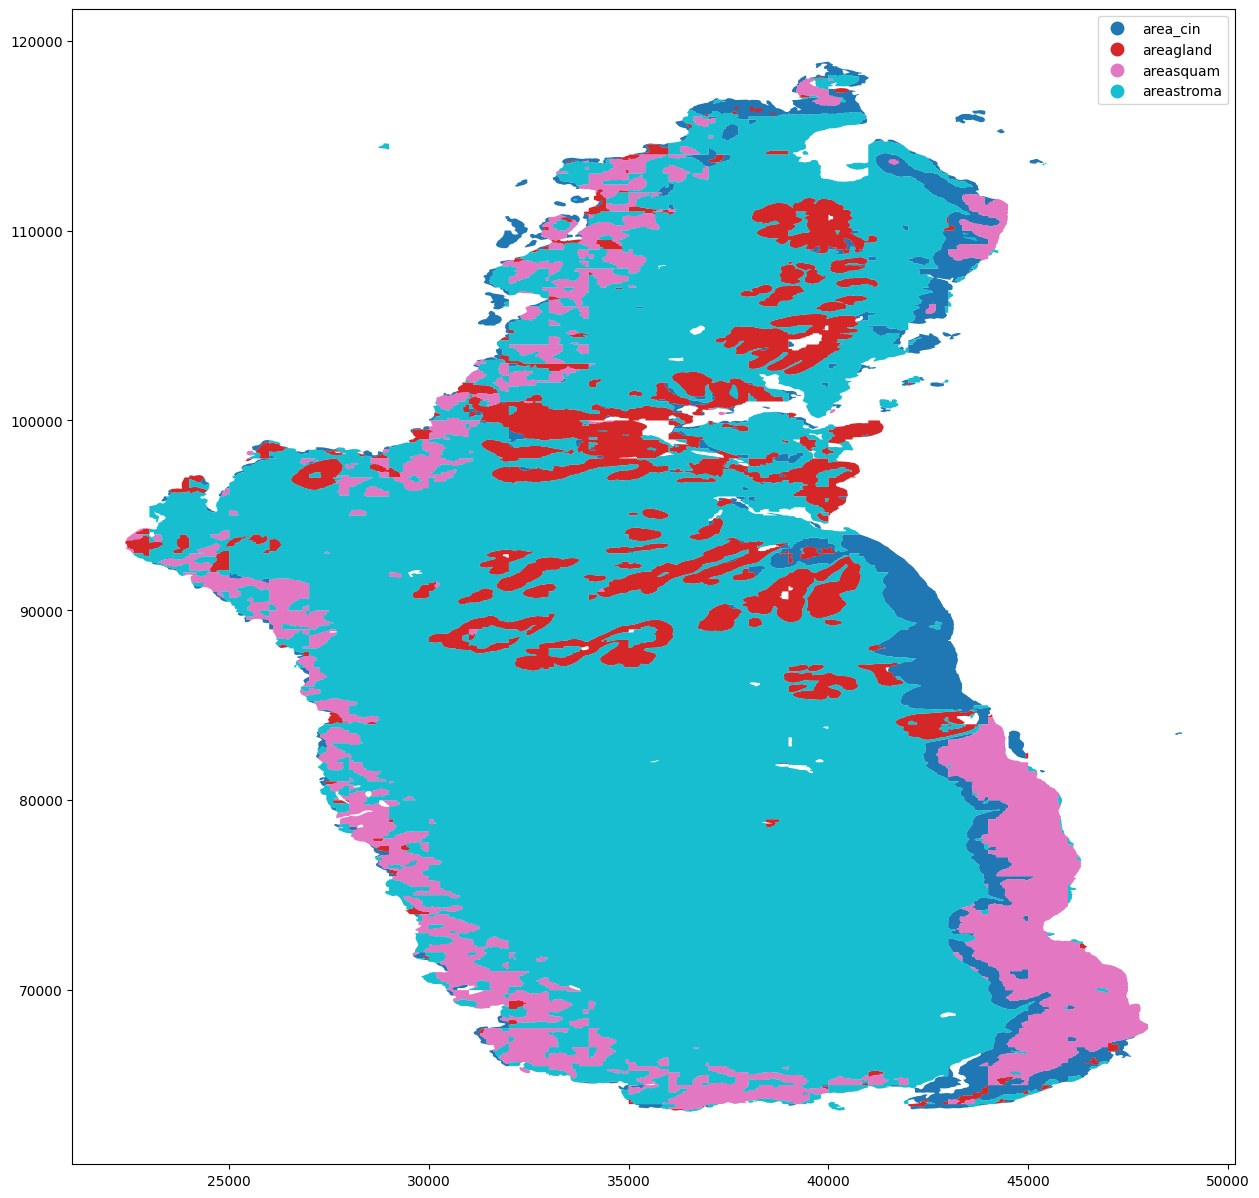

In [10]:
area_merger.annots.plot(
    figsize=(15, 15),
    column="class_name",
    legend=True,
    aspect=None,
)